<a href="https://colab.research.google.com/github/atsiolis/cat_dog/blob/main/Copy_of_fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [ ]:
# 3

import pandas as pd

# List all image files in the test directory
test_filenames = sorted(os.listdir(test_dir))  # Ensures consistent order

# Create a DataFrame with file paths (full path) and dummy labels (if needed)
test_df = pd.DataFrame({"filename": test_filenames})

train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


train_data_gen = train_image_generator.flow_from_directory(train_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           batch_size=batch_size,
                                                           class_mode='binary',
                                                           color_mode='rgb')
val_data_gen = validation_image_generator.flow_from_directory(validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              batch_size=batch_size,
                                                              class_mode='binary',
                                                              color_mode='rgb')
test_data_gen = test_image_generator.flow_from_dataframe(dataframe=test_df,
                                                         directory=test_dir,  # Path to the test images
                                                         x_col="filename",  # Column containing image file names
                                                         target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                         batch_size=batch_size,
                                                         class_mode=None,  # No labels for test data
                                                         shuffle=False  # Keep order for evaluation
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 validated image filenames.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


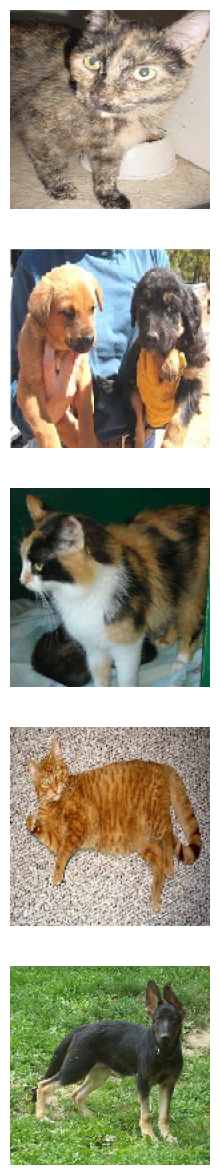

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1.0/255,  # Rescale pixel values to [0, 1]
    rotation_range=40,  # Randomly rotate images by up to 40 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by 20%
    height_shift_range=0.2,  # Randomly shift images vertically by 20%
    shear_range=0.2,  # Randomly apply shearing transformations
    zoom_range=0.2,  # Randomly zoom in or out
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill pixels that are newly created after a transformation
)

train_dir = "/content/cats_and_dogs/train"  # Replace with your actual train directory path

# Use the flow_from_directory method to load and augment images
train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize all images to 150x150
    batch_size=32,  # Batch size
    class_mode='binary'  # Assuming binary classification (2 classes)
)


Found 2000 images belonging to 2 classes.


Found 2000 images belonging to 2 classes.


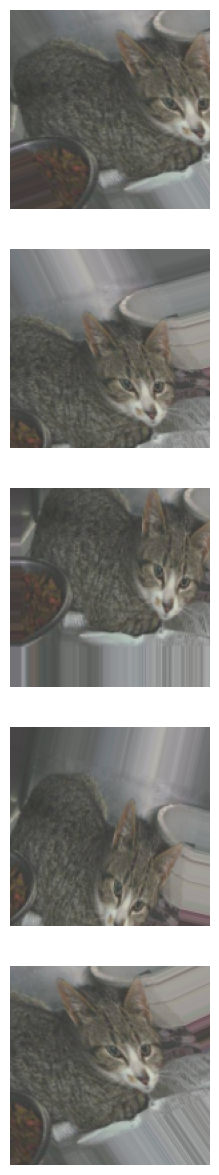

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# 7
from tensorflow.keras.optimizers import Adam
# Define the model
model = Sequential([
    # First Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),  # 32 filters, 3x3 kernel, ReLU activation
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling with 2x2 pool size

    # Second Convolutional Layer
    Conv2D(64, (3, 3), activation='relu'),  # 64 filters, 3x3 kernel, ReLU activation
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling with 2x2 pool size

    # Third Convolutional Layer
    Conv2D(128, (3, 3), activation='relu'),  # 128 filters, 3x3 kernel, ReLU activation
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling with 2x2 pool size


    # Flatten the output from 3D to 1D for the fully connected layer
    Flatten(),

    # Fully connected layer
    Dense(128, activation='relu'),  # Fully connected layer with 128 units and ReLU activation

    # Output layer for classification
    Dense(1, activation='sigmoid')  # For binary classification (use softmax for multi-class)
])

# Compile the model
model.compile(
    optimizer=Adam(),  # Adam optimizer for efficient training
    loss='binary_crossentropy',  # Binary cross-entropy for binary classification
    metrics=['accuracy']  # Track accuracy during training
)

# Display model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 8
history = model.fit(
    train_data_gen,  # Training data generator
    epochs=15,  # Number of epochs
    validation_data=val_data_gen,  # Validation data generator
)

Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.4980 - loss: 0.9891 - val_accuracy: 0.5000 - val_loss: 0.6908
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 905ms/step - accuracy: 0.5033 - loss: 0.6908 - val_accuracy: 0.4990 - val_loss: 0.6771
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 926ms/step - accuracy: 0.5517 - loss: 0.6805 - val_accuracy: 0.6090 - val_loss: 0.6542
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 913ms/step - accuracy: 0.5566 - loss: 0.6795 - val_accuracy: 0.5690 - val_loss: 0.6552
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 942ms/step - accuracy: 0.5756 - loss: 0.6614 - val_accuracy: 0.5190 - val_loss: 0.6724
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 918ms/step - accuracy: 0.6145 - loss: 0.6431 - val_accuracy: 0.6540 - val_loss: 0.6238
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 923ms/step - accuracy: 0.6579 - loss: 0.6205 - val_accuracy: 0.6640 - val_loss: 0.6095
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 902ms/step - accuracy: 0.6283 - loss: 0.6280 - val_accurac

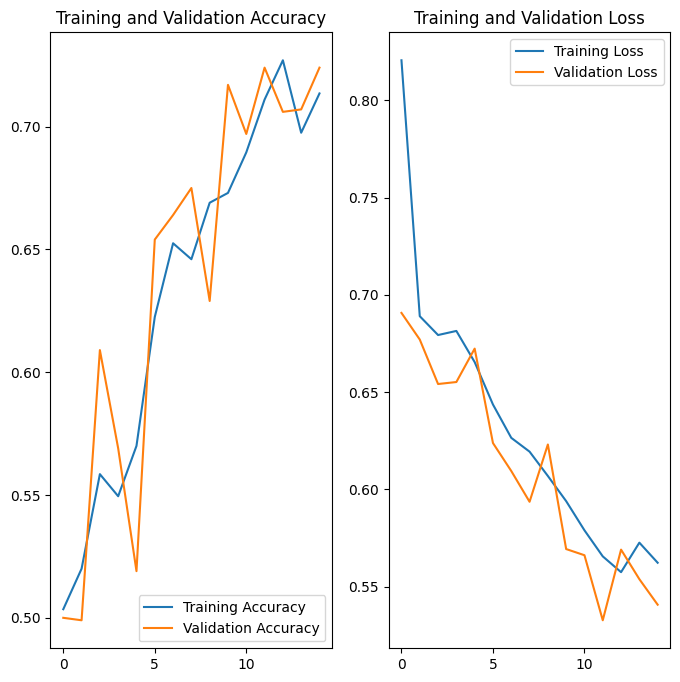

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


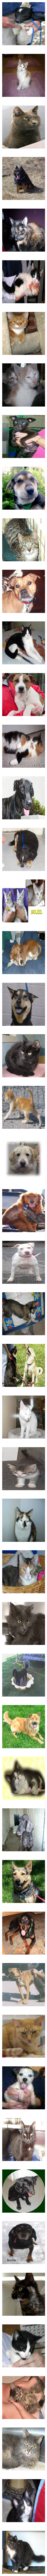

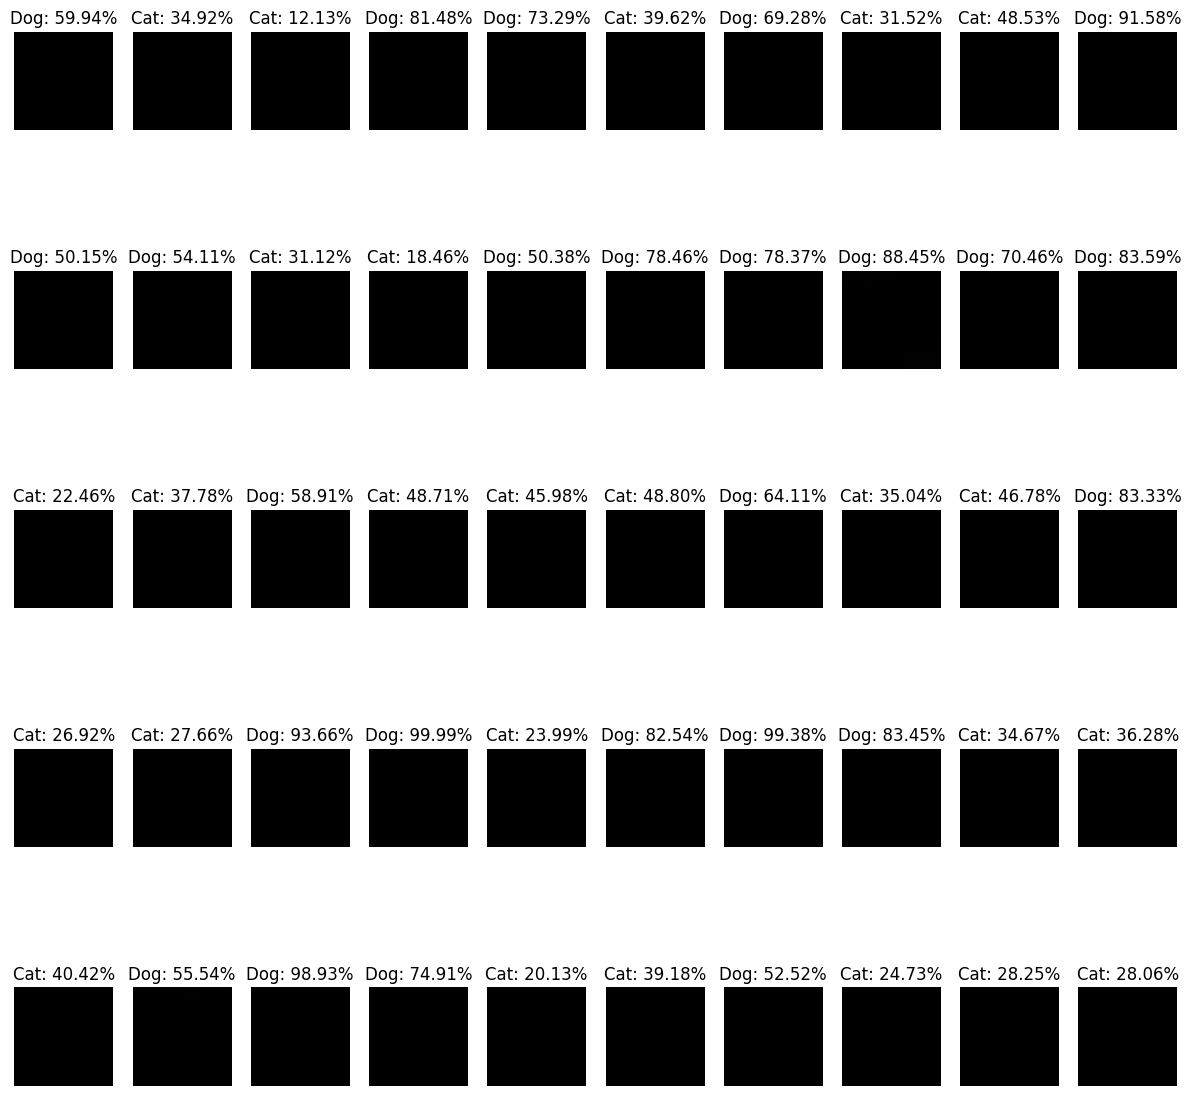

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Get model predictions
probabilities = model.predict(test_data_gen)

# Convert probabilities into percentage format (0-100%)
probabilities_percent = (probabilities * 100).flatten()  # Ensure it's a 1D array

# Convert probabilities into class labels (0 for cat, 1 for dog)
predictions = (probabilities >= 0.5).astype(int).flatten()
plotImages(test_images)
''' # Function to plot images along with their predicted probabilities
def plot_images(images, probabilities, labels):
    plt.figure(figsize=(15, 15))
    for i in range(len(images)):
        ax = plt.subplot(5, 10, i + 1)  # Adjust grid size if needed
        plt.imshow(images[i].astype("uint8"))  # Convert to correct format
        plt.title(f"{'Dog' if labels[i] == 1 else 'Cat'}: {probabilities[i]:.2f}%")
        plt.axis('off')
    plt.show()

num_batches = math.ceil(test_data_gen.samples / test_data_gen.batch_size)  # Get total batches
test_images = []

# Correctly extract images without labels
for _ in range(num_batches):
    batch_images = next(test_data_gen)  # No need to unpack
    test_images.append(batch_images)

# Flatten the list of images and ensure correct number of samples
test_images = np.concatenate(test_images, axis=0)[:test_data_gen.samples]

# Call the plot function
plot_images(test_images, probabilities_percent, predictions) '''


In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")